In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore")

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import VotingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score,  recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, accuracy_score

## Data Exploration

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TelcoCustomerChurn/raw_data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [13]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
df.shape


(7043, 21)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [18]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
df['StreamingTV'].value_counts()

,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526


In [20]:
df['TechSupport'].value_counts()

,count
TechSupport,
No,3473
Yes,2044
No internet service,1526


In [21]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [22]:
df['tenure'].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [23]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [24]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [25]:
df.duplicated().sum()


0

In [26]:
df['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526


In [27]:
df['OnlineBackup'].value_counts()

,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526


In [28]:
df['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


In [29]:
df['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526


In [30]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [31]:
df['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
Yes,4171
No,2872


In [32]:
df['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [33]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


## Data Transformation

In [34]:
df= df.drop(columns='customerID')

In [35]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Deep analysis reveals indirect missingness, likely from blank spaces. Let’s investigate!**

In [36]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [37]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].isnull().sum()

11

In [38]:
df['SeniorCitizen'] = pd.to_numeric(df.SeniorCitizen, errors='coerce')
df['SeniorCitizen'].isnull().sum()

0

In [39]:
df['tenure'] = pd.to_numeric(df.tenure, errors='coerce')
df['tenure'].isnull().sum()

0

In [40]:
df['MonthlyCharges'] = pd.to_numeric(df.MonthlyCharges, errors='coerce')
df['MonthlyCharges'].isnull().sum()

0

In [41]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [42]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Notably, the Tenure column shows 0 for these entries, despite values in MonthlyCharges. Let's check for other 0 values in Tenure.

In [43]:
df[df['tenure'] == 0]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [44]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [45]:
df = df[df['tenure'] != 0]


In [46]:
df[df['tenure'] == 0]


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


After filtering the data with df[df['tenure'] == 0], all rows with a tenure of 0 were removed, effectively excluding all new customers who hadn't accumulated total charges (TotalCharges) yet.

In [47]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [48]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Encoding

Applied Label Encoding for binary columns and OneHot Encoding for multi-category columns using a Pipeline and ColumnTransformer. This organized approach simplifies data transformation for modeling.

In [50]:
# Label encode binary columns directly
label_columns = ["gender", "Partner", "Dependents", "PhoneService", "Churn"]
for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# OneHot encode for columns with multiple categories
onehot_columns = [
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "Contract", "PaperlessBilling", "PaymentMethod"
]

# Build a preprocessor using ColumnTransformer and OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), onehot_columns)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Create a pipeline to apply the preprocessing and then fit a model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Apply transformations and convert to a DataFrame
df_transformed = pipeline.fit_transform(df)
df_encoded = pd.DataFrame(df_transformed, columns=pipeline.named_steps['preprocessor'].get_feature_names_out())
df_encoded.head()


,onehot__MultipleLines_No,onehot__MultipleLines_No phone service,onehot__MultipleLines_Yes,onehot__InternetService_DSL,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__OnlineSecurity_No,onehot__OnlineSecurity_No internet service,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_No,onehot__OnlineBackup_No internet service,onehot__OnlineBackup_Yes,onehot__DeviceProtection_No,onehot__DeviceProtection_No internet service,onehot__DeviceProtection_Yes,onehot__TechSupport_No,onehot__TechSupport_No internet service,onehot__TechSupport_Yes,onehot__StreamingTV_No,onehot__StreamingTV_No internet service,onehot__StreamingTV_Yes,onehot__StreamingMovies_No,onehot__StreamingMovies_No internet service,onehot__StreamingMovies_Yes,onehot__Contract_Month-to-month,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_No,onehot__PaperlessBilling_Yes,onehot__PaymentMethod_Bank transfer (automatic),onehot__PaymentMethod_Credit card (automatic),onehot__PaymentMethod_Electronic check,onehot__PaymentMethod_Mailed check,remainder__gender,remainder__SeniorCitizen,remainder__Partner,remainder__Dependents,remainder__tenure,remainder__PhoneService,remainder__MonthlyCharges,remainder__TotalCharges,remainder__Churn
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,29.85,29.85,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,34.0,1.0,56.95,1889.50,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,53.85,108.15,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,45.0,0.0,42.30,1840.75,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,70.70,151.65,1.0


In [51]:
df_encoded.columns = df_encoded.columns.str.replace('onehot__', '', regex=True)
df_encoded.columns = df_encoded.columns.str.replace('remainder__', '', regex=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '_', regex=True)
df_encoded.columns = df_encoded.columns.str.replace('-', '_', regex=True)
df_encoded.columns = df_encoded.columns.str.replace('ـ', '_', regex=True)

df_encoded.columns

Index(['MultipleLines_No', 'MultipleLines_No_phone_service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber_optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No_internet_service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No_internet_service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No_internet_service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No_internet_service',
       'StreamingMovies_Yes', 'Contract_Month_to_month', 'Contract_One_year',
       'Contract_Two_year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank_transfer_(automatic)',
       'PaymentMethod_Credit_card_(automatic)',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check',
  

In [52]:
s= pd.DataFrame(df_encoded.dtypes)
s

,0
MultipleLines_No,float64
MultipleLines_No_phone_service,float64
MultipleLines_Yes,float64
InternetService_DSL,float64
InternetService_Fiber_optic,float64
InternetService_No,float64
OnlineSecurity_No,float64
OnlineSecurity_No_internet_service,float64
OnlineSecurity_Yes,float64
OnlineBackup_No,float64


## Exploratory Data Analysis (EDA)

Analyzed correlations in the original dataset for an overview of relationships between variables. This general view helped identify potential patterns before diving deeper into the analysis with the encoded dataset.

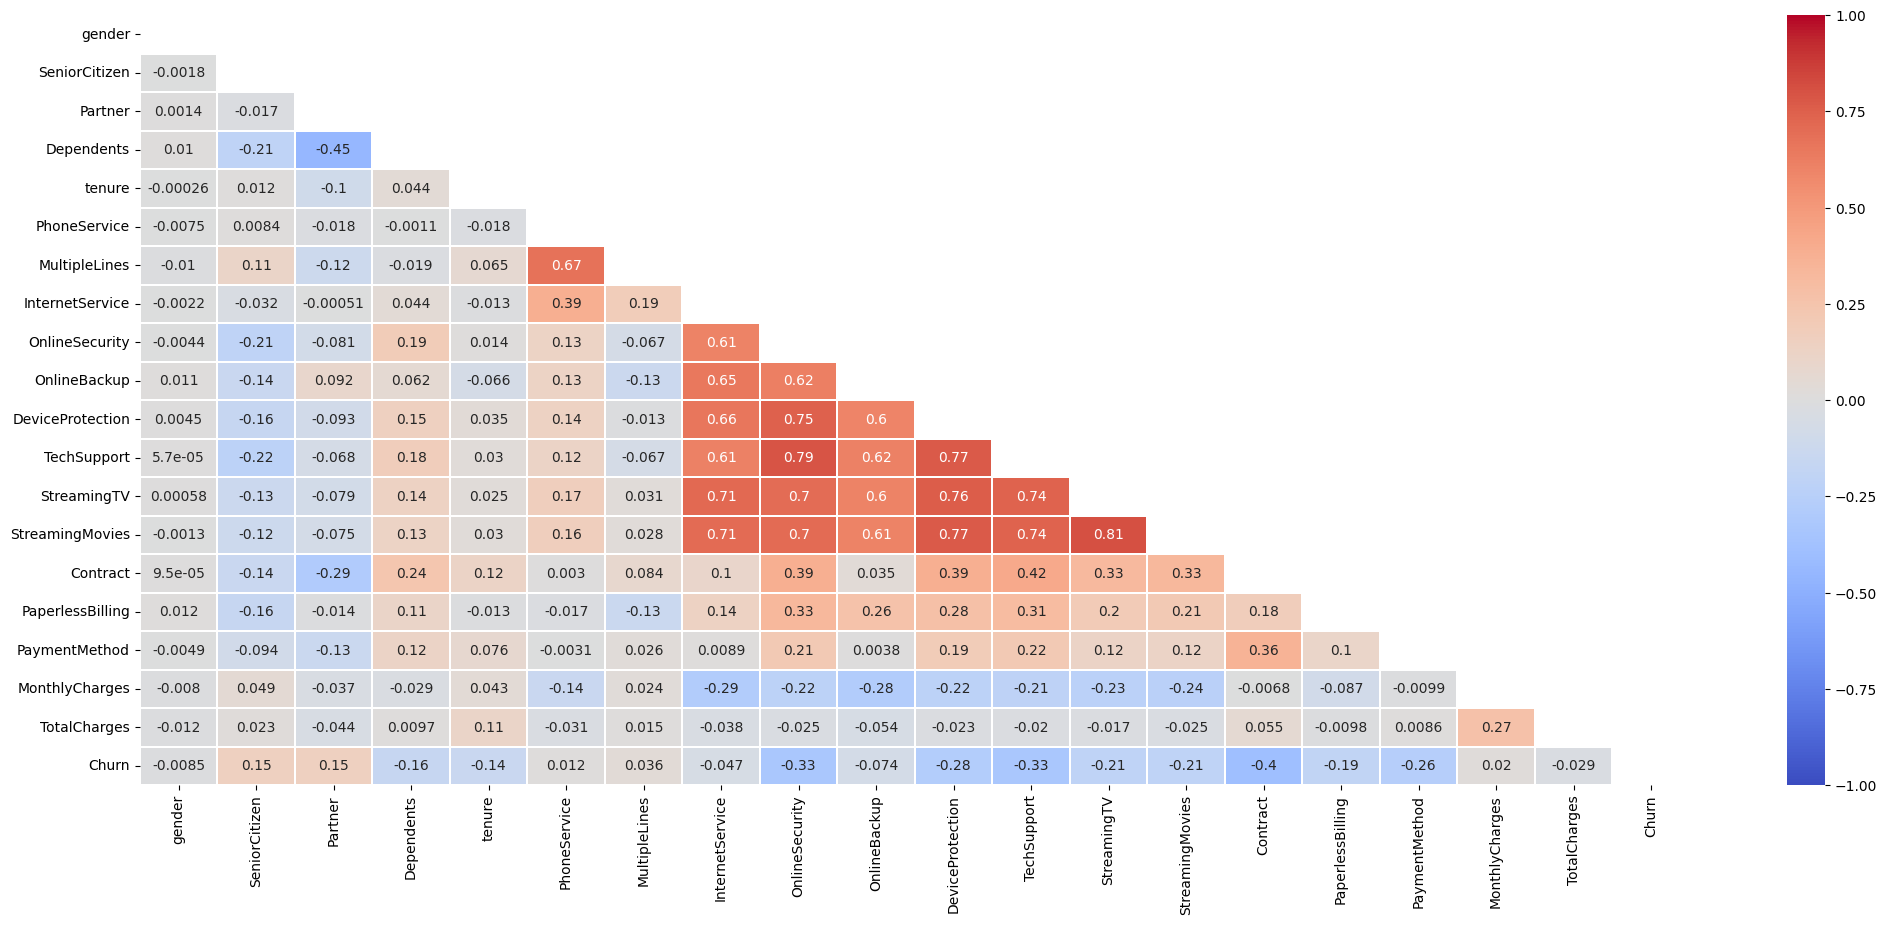

In [53]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

- 26.6% of customers Churn to another company.
- Customers are 49.5% female and 50.5% male.

In [54]:
gender_counts = df_encoded['gender'].value_counts()
churn_counts = df_encoded['Churn'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['Male', 'Female'], values=gender_counts, hole=.4), 1, 1)
fig.add_trace(go.Pie(labels=['No', 'Yes'], values=churn_counts, hole=.4), 1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(title_text="Gender and Churn Distributions",
                   annotations=[dict(text='Gender', x=0.20, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.80, y=0.5, font_size=20, showarrow=False)])

fig.show()


Examination the relationship between Gender and Churn using pie charts for each category. The results showed that churn rates are similar for both males and females, indicating that there is no strong relationship between gender and churn.

In [55]:
gender_churn_distribution = pd.crosstab(df_encoded['gender'], df_encoded['Churn'], normalize='index')
gender_churn_distribution

Churn,0.0,1.0
gender,,
0.0,0.730405,0.269595
1.0,0.737954,0.262046


Churn Distribution by Gender: The chart shows that both females and males have similar churn rates, with a slightly higher count of females churning compared to males.

In [56]:
df_encoded['gender_display'] = df_encoded['gender'].map({0: 'Female', 1: 'Male'})

fig = px.histogram(
    df_encoded,
    x="gender_display",
    color="Churn",
    barmode="group",
    title="<b>Churn Distribution by Gender</b>",
    labels={"gender_display": "Gender", "Churn": "Churn"}
)

fig.for_each_trace(lambda t: t.update(name="No" if t.name == "0" else "Yes"))

fig.update_layout(
    width=800,
    height=600,
    bargap=0.1,
)

fig.show()

In [57]:
df_encoded.drop(columns='gender_display', inplace=True)

In [58]:
gender_churn_counts = pd.crosstab(df_encoded['gender'], df_encoded['Churn'])

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

male_counts = gender_churn_counts.loc[0]
female_counts = gender_churn_counts.loc[1]

fig.add_trace(go.Pie(labels=['No Churn', 'Churn'], values=male_counts, hole=.4, name="Male"), 1, 1)

fig.add_trace(go.Pie(labels=['No Churn', 'Churn'], values=female_counts, hole=.4, name="Female"), 1, 2)

fig.update_layout(
    title_text="Churn Distribution by Gender",
    annotations=[dict(text='Male', x=0.21, y=0.5, font_size=16, showarrow=False),
                 dict(text='Female', x=0.80, y=0.5, font_size=16, showarrow=False)]
)

fig.show()


In [59]:
df_encoded["Churn"][df_encoded["Churn"]==0].groupby(by=df_encoded["gender"]).count()


,Churn
gender,
0.0,2544
1.0,2619


In [60]:
df_encoded["Churn"][df_encoded["Churn"]==1].groupby(by=df_encoded["gender"]).count()


,Churn
gender,
0.0,939
1.0,930


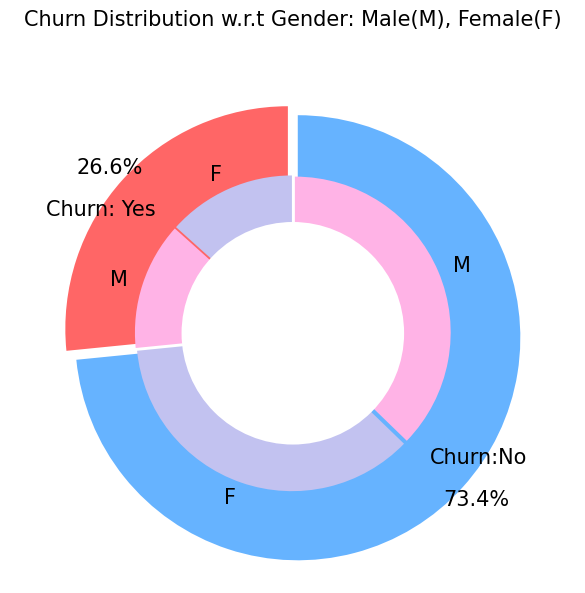

In [61]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

Approximately 75% of customers with a Month-to-Month contract chose to churn, compared to 13% of those with a One-Year contract and only 3% with a Two-Year contract.

In [62]:
contracts = {
    "Month-to-Month": "Contract_Month_to_month",
    "One Year": "Contract_One_year",
    "Two Year": "Contract_Two_year"
}

fig = go.Figure()

for contract_name, column_name in contracts.items():
    churn_counts = df_encoded[df_encoded[column_name] == 1].groupby("Churn").size()
    fig.add_trace(go.Bar(
        x=["No Churn", "Churn"],
        y=[churn_counts.get(0, 0), churn_counts.get(1, 0)],
        name=contract_name
    ))

fig.update_layout(
    title_text="<b>Customer Contract Distribution by Churn</b>",
    barmode='group',
    width=700,
    height=500,
    bargap=0.1
)

fig.show()


Distribution of payment methods among customers shows that Electronic Check is the most common payment method.

In [63]:
payment_methods = {
    "Electronic Check": df_encoded["PaymentMethod_Electronic_check"].sum(),
    "Mailed Check": df_encoded["PaymentMethod_Mailed_check"].sum(),
    "Bank Transfer (Automatic)": df_encoded["PaymentMethod_Bank_transfer_(automatic)"].sum(),
    "Credit Card (Automatic)": df_encoded["PaymentMethod_Credit_card_(automatic)"].sum()
}

labels = list(payment_methods.keys())
values = list(payment_methods.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

The majority of customers who churned were using Electronic Check as their payment method. In contrast, customers who chose Credit Card automatic transfer, Bank automatic transfer, or Mailed Check were less likely to churn.

In [64]:
payment_methods = {
    "Electronic Check": df_encoded[df_encoded["PaymentMethod_Electronic_check"] == 1].groupby("Churn").size(),
    "Mailed Check": df_encoded[df_encoded["PaymentMethod_Mailed_check"] == 1].groupby("Churn").size(),
    "Bank Transfer (Automatic)": df_encoded[df_encoded["PaymentMethod_Bank_transfer_(automatic)"] == 1].groupby("Churn").size(),
    "Credit Card (Automatic)": df_encoded[df_encoded["PaymentMethod_Credit_card_(automatic)"] == 1].groupby("Churn").size()
}

fig = go.Figure()

for method, counts in payment_methods.items():
    fig.add_trace(go.Bar(
        x=["No Churn", "Churn"],
        y=[counts.get(0, 0), counts.get(1, 0)],
        name=method

    ))

fig.update_layout(
    title_text="<b>Customer Payment Method distribution w.r.t. Churn</b>",
    legend_title_text="Payment Method",
    barmode='stack',
    width=700,
    height=500,
    bargap=0.1
)

fig.show()


A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [65]:
internet_services = {
    "DSL": "InternetService_DSL",
    "Fiber optic": "InternetService_Fiber_optic",
    "No Internet": "InternetService_No"
}

fig = go.Figure()

for service_name, column_name in internet_services.items():
    churn_counts = df_encoded.groupby(["Churn", "gender"])[column_name].sum().unstack().fillna(0)

    fig.add_trace(go.Bar(
        x=["Churn:No - Female", "Churn:No - Male", "Churn:Yes - Female", "Churn:Yes - Male"],
        y=[churn_counts.loc[0, 0], churn_counts.loc[0, 1],
           churn_counts.loc[1, 0], churn_counts.loc[1, 1]],
        name=service_name
    ))

fig.update_layout(
    title_text="<b>Churn Distribution by Internet Service and Gender</b>",
    legend_title_text="Internet Service",
    barmode='group',
    xaxis_title="Churn and Gender",
    yaxis_title="Count",
    width=800,
    height=600
)

fig.show()


Customers who do not have dependents show a higher tendency to churn.

In [66]:
fig = px.histogram(
    df_encoded,
    x="Churn",
    color="Dependents",
    barmode="group",
    title="<b>Dependents Distribution</b>"
)

fig.for_each_trace(lambda t: t.update(name = "Yes" if t.name == "1.0" else "No"))

fig.update_xaxes(tickvals=[0, 1], ticktext=["No Churn", "Churn"])

fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Customers without partners show a higher likelihood of churning.

In [67]:
fig = px.histogram(
    df_encoded,
    x="Churn",
    color="Partner",
    barmode="group",
    title="<b>Churn Distribution Based on Partner Status</b>"
)

fig.for_each_trace(lambda t: t.update(name = "Yes" if t.name == "1.0" else "No"))

fig.update_xaxes(tickvals=[0, 1], ticktext=["No Churn", "Churn"])

fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


The percentage of senior citizens is quite low, with most of them tending to churn.

In [68]:
fig = px.histogram(
    df_encoded,
    x="Churn",
    color="SeniorCitizen",
    barmode="group",
    title="<b>Churn Distribution by Senior Citizen Status</b>",
    category_orders={"SeniorCitizen": [0, 1]}
)

fig.for_each_trace(lambda t: t.update(name = "Yes" if t.name == "1.0" else "No"))
fig.update_xaxes(tickvals=[0, 1], ticktext=["No Churn", "Churn"])

fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


The majority of customers are more likely to churn if they do not have online security.

In [69]:
df_encoded['OnlineSecurity_Status'] = df_encoded[['OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineSecurity_No_internet_service']].idxmax(axis=1).replace({
    'OnlineSecurity_No': 'No',
    'OnlineSecurity_Yes': 'Yes',
    'OnlineSecurity_No_internet_service': 'No internet service'
})

fig = px.histogram(
    df_encoded,
    x="Churn",
    color="OnlineSecurity_Status",
    barmode="group",
    title="<b>Churn Distribution Based on Online Security Status</b>")

fig.update_xaxes(tickvals=[0, 1], ticktext=["No Churn", "Churn"])
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


In [70]:
df_encoded.drop(columns= ['OnlineSecurity_Status'], inplace=True)


Customers with Paperless Billing are most likely to churn

In [71]:
df_encoded['PaperlessBilling_Status'] = df_encoded[['PaperlessBilling_No', 'PaperlessBilling_Yes']].idxmax(axis=1).replace({
    'PaperlessBilling_No': 'No',
    'PaperlessBilling_Yes': 'Yes'
})


fig = px.histogram(df_encoded,
                   x="Churn",
                   color="PaperlessBilling_Status",
                    barmode="group",

                   title="<b>Chrun distribution Based on Paperless Billing</b>"
)

fig.update_xaxes(tickvals=[0, 1], ticktext=["No Churn", "Churn"])
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [72]:
df_encoded.drop(columns= ['PaperlessBilling_Status'], inplace=True)


Customers with no TechSupport are most likely to migrate to another service provider

In [73]:
df_encoded['TechSupport_Status'] = df_encoded[['TechSupport_No', 'TechSupport_Yes', 'TechSupport_No_internet_service']].idxmax(axis=1).replace({
    'TechSupport_No': 'No',
    'TechSupport_Yes': 'Yes',
    'TechSupport_No_internet_service': 'No internet service'
})


fig = px.histogram(df_encoded,
                   x="Churn",
                   color="TechSupport_Status",
                   barmode="group",
                   title="<b>Chrun distribution Based on TechSupport</b>")

fig.update_xaxes(tickvals=[0, 1], ticktext=["No Churn", "Churn"])
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [74]:
df_encoded.drop(columns='TechSupport_Status', inplace=True)

The majority have phone service. The issue lies with those who do not, as a third of those without phone service tend to churn.

In [75]:
fig = px.histogram(df, x="Churn",
                   color="PhoneService",
                   title="<b>Chrun distribution Based on Phone Service</b>")

fig.for_each_trace(lambda t: t.update(name="Yes" if t.name == "1" else "No"))

fig.update_xaxes(tickvals=[0, 1], ticktext=["No Churn", "Churn"])
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers with higher Monthly Charges are also more likely to churn

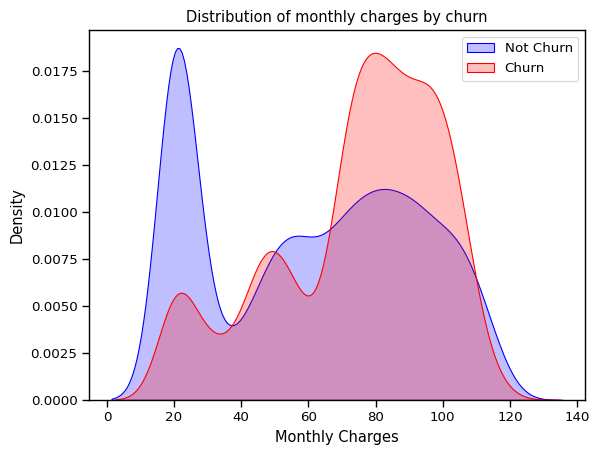

In [76]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df_encoded.MonthlyCharges[(df_encoded["Churn"] == 0) ],
                color="Blue", shade = True);
ax = sns.kdeplot(df_encoded.MonthlyCharges[(df_encoded["Churn"] == 1) ],
                ax =ax, color="Red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers with lower total charges are more likely to churn, while those with higher total charges are less likely to leave.

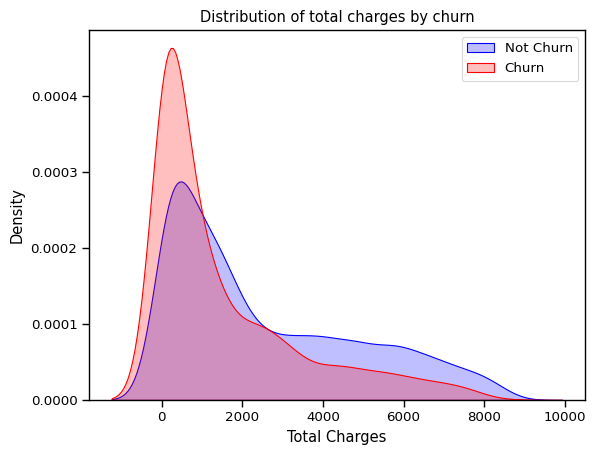

In [77]:
ax = sns.kdeplot(df_encoded.TotalCharges[(df_encoded["Churn"] == 0) ],
                color="Blue", shade = True);
ax = sns.kdeplot(df_encoded.TotalCharges[(df_encoded["Churn"] == 1) ],
                ax =ax, color="Red", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

Customers with shorter tenure periods are more likely to churn, while those with longer tenure are more likely to stay. This suggests that customer loyalty increases with tenure duration.

In [78]:
fig = px.box(df_encoded, x='Churn', y = 'tenure')

fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=1)

fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

## Model Building

### preparing data for modeling

In [79]:
X = df_encoded.drop(columns = ['Churn'])
y = df_encoded['Churn']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42, stratify=y)

Since the numerical features are distributed over different value ranges, using standard scaler to scale them down to the same range is best solution

In [81]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

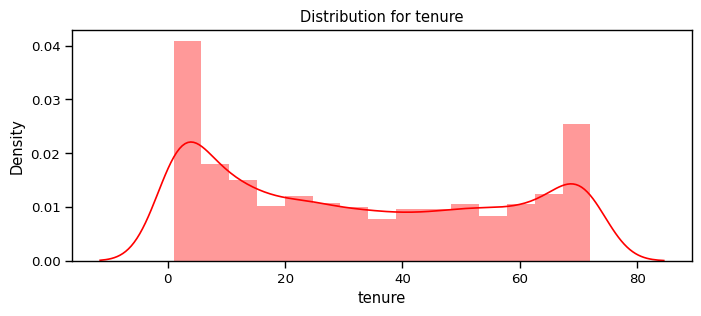

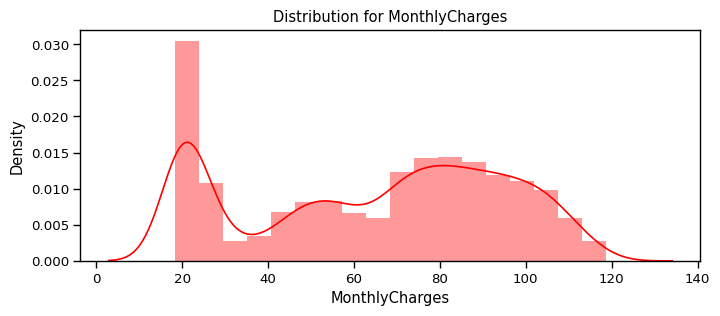

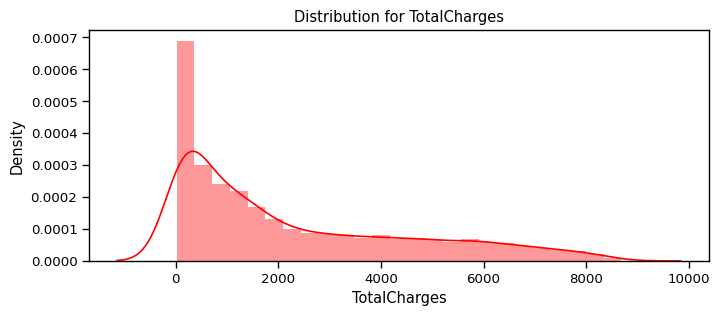

In [82]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']


for feat in num_cols: distplot(feat, df_encoded)

### Standardizing numeric attributes

In [83]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


### Models

#### KNN

In [84]:
knn_model = KNeighborsClassifier(n_neighbors=11)

cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
cv_score_mean = cv_scores.mean()

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Cross-validation Accuracy:", cv_score_mean)
print("Test Accuracy:", test_accuracy)


Cross-validation Accuracy: 0.7819999174611036
Test Accuracy: 0.771090047393365


In [ ]:
print(classification_report(y_test, y_pred))


'              precision    recall  f1-score   support\n\n         0.0       0.84      0.85      0.84      1549\n         1.0       0.57      0.55      0.56       561\n\n    accuracy                           0.77      2110\n   macro avg       0.71      0.70      0.70      2110\nweighted avg       0.77      0.77      0.77      2110\n'

#### SVC

In [86]:
svc_model = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_svc_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_svc_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

test_accuracy_alternative = best_svc_model.score(X_test, y_test)
print("Alternative Test Accuracy:", test_accuracy_alternative)


Best Parameters: {'C': 10, 'class_weight': None, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Test Accuracy: 0.7943127962085308
Alternative Test Accuracy: 0.7943127962085308


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1549
         1.0       0.67      0.45      0.54       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



#### Random Forest

In [88]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_rf_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

test_accuracy_alternative = best_rf_model.score(X_test, y_test)
print("Alternative Test Accuracy:", test_accuracy_alternative)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy: 0.7909952606635071
Alternative Test Accuracy: 0.7909952606635071


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1549
         1.0       0.64      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



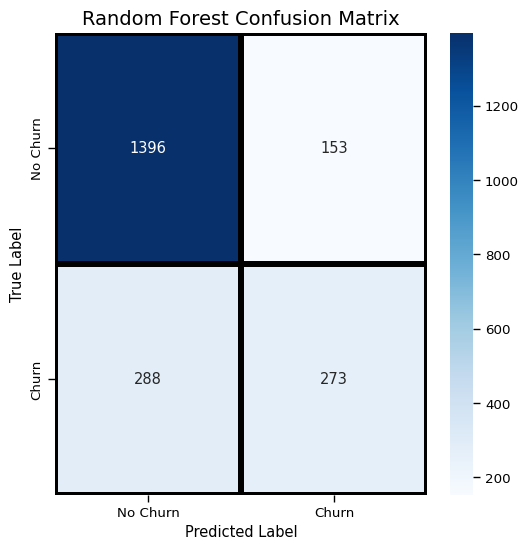

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linecolor="k", linewidths=3,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Random Forest Confusion Matrix", fontsize=14)
plt.show()


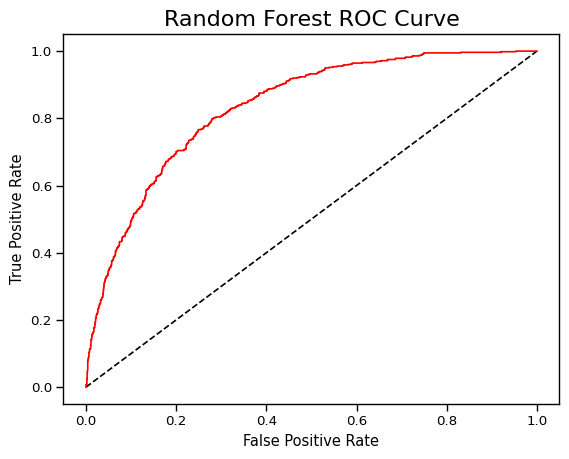

In [91]:
y_rfpred_prob = best_rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

#### Logistic Regression

In [ ]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga'],
    'l1_ratio': [0, 0.5, 1]
}

grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_logreg_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_logreg_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

test_accuracy_alternative = best_logreg_model.score(X_test, y_test)
print("Alternative Test Accuracy:", test_accuracy_alternative)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.01, 'l1_ratio': 0, 'penalty': 'l2', 'solver': 'saga'}
Test Accuracy: 0.7976303317535545

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1549
         1.0       0.66      0.50      0.57       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.80      0.79      2110

Alternative Test Accuracy: 0.7976303317535545


#### Decision Tree Classifier

In [93]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_
print("Best Parameters for Decision Tree:", best_params)


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [94]:
y_pred = best_dt_model.predict(X_test)
y_pred_proba = best_dt_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Test Accuracy:", test_accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.785781990521327
ROC AUC Score: 0.795636653628527
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1549
         1.0       0.62      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



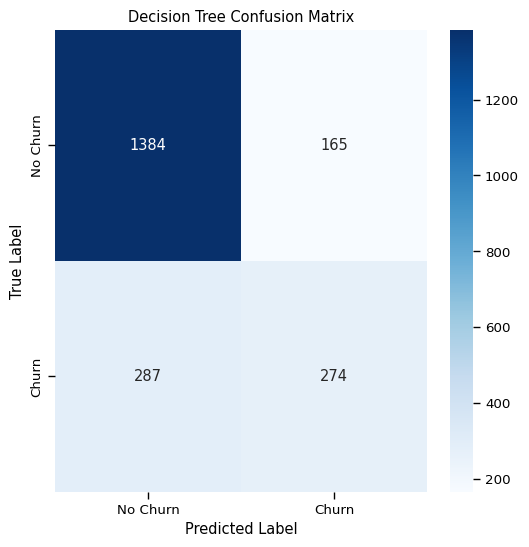

In [95]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Decision Tree Confusion Matrix")
plt.show()


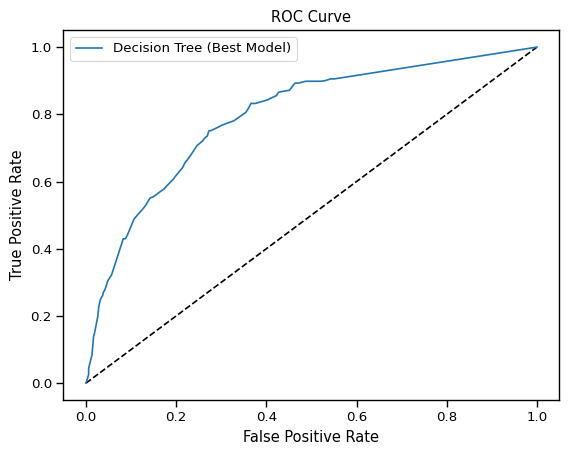

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="Decision Tree (Best Model)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()


#### AdaBoost Classifier

In [97]:
estimator = DecisionTreeClassifier(max_depth=1, random_state=42)
adaboost_model = AdaBoostClassifier(estimator=estimator, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.1,0.003, 0.03,0.3, 1.0 ],
    'estimator__max_depth': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_adaboost_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_adaboost_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'estimator__max_depth': 1, 'learning_rate': 0.3, 'n_estimators': 100}
Test Accuracy: 0.7938388625592417


In [98]:
y_pred = best_adaboost_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7938388625592417
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1549
         1.0       0.64      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110



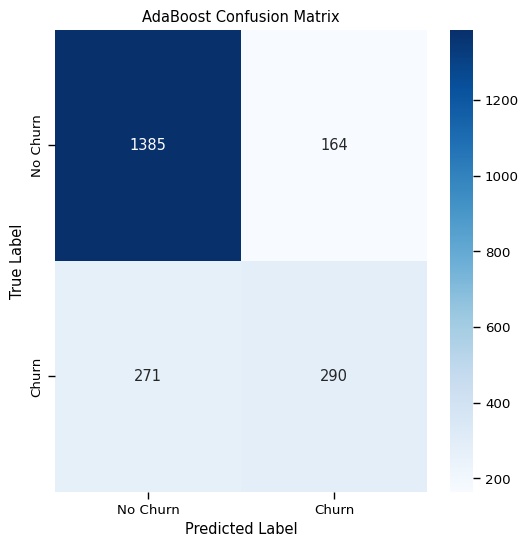

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("AdaBoost Confusion Matrix")
plt.show()

#### Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 1.0}


In [101]:

y_pred = best_gb_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.795260663507109

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.64      0.52      0.57       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



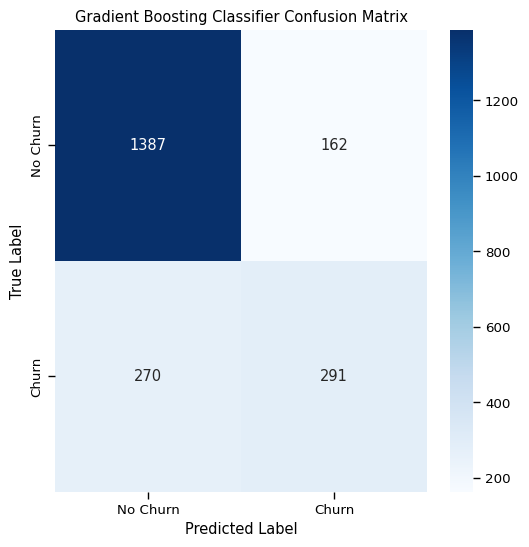

In [102]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Gradient Boosting Classifier Confusion Matrix")
plt.show()


#### Voting Classifier

Implemented a Voting Classifier combining Random Forest, Gradient Boosting, AdaBoost, Logistic Regression, and SVC models to enhance prediction stability and accuracy by leveraging multiple algorithms.

In [ ]:


rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
log_model = LogisticRegression(max_iter=1000, random_state=42)
svc_model = SVC(probability=True, C=1, gamma='scale', random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('ada', ada_model),
        ('log', log_model),
        ('svc', svc_model)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7971563981042654

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1549
         1.0       0.66      0.49      0.56       561

    accuracy                           0.80      2110
   macro avg       0.75      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



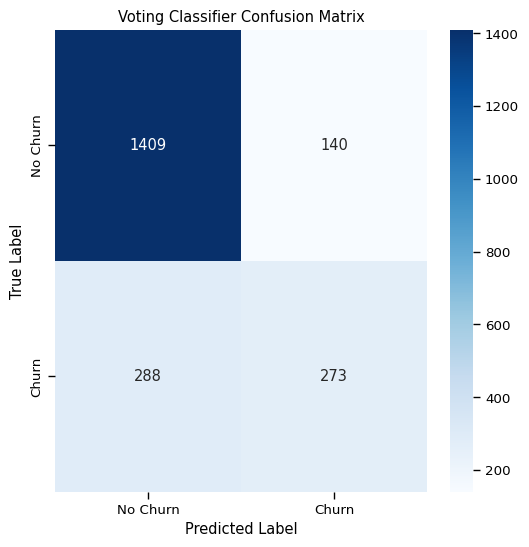

In [104]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Voting Classifier Confusion Matrix")
plt.show()

#### XGBoost

Developed an XGBoost model achieving the highest accuracy at 80%, providing strong predictive performance for customer churn analysis.

In [ ]:
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_

y_pred = best_xgb_model.predict(X_test)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_de

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.8014218009478673
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1549
         1.0       0.66      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



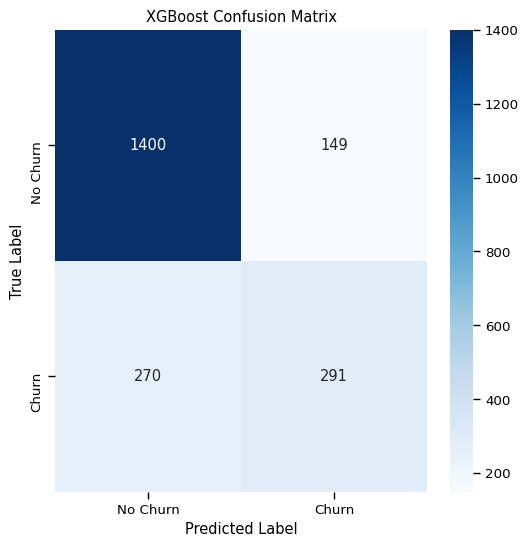

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("XGBoost Confusion Matrix")
plt.show()


In [ ]:
import pickle

with open('XGBoost_model.pkl', 'wb') as file:
    pickle.dump(best_xgb_model, file)
